<a href="https://colab.research.google.com/github/joyjixu/qm2_resources/blob/main/data_analysis/sentiment_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
sentiment_covid = pd.read_csv('/content/covid_sentiment_daily_04_01.csv', engine='python')
sentiment_covid

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,retweet_count,retweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_screen_name,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name.1,user_statuses_count,user_time_zone,user_urls,user_verified,is_state,state,sentiment,magnitude
0,NaN,Wed Apr 01 00:05:04 +0000 2020,NaN,NaN,https://www.jnj.com/johnson-johnson-announces-...,0,1245140085584117763,NaN,NaN,NaN,en,NaN,False,0,NaN,NaN,"<a href=""http://twitter.com/#!/download/ipad"" ...",SCARY—8 new strains now: Johnson &amp; Johnson...,https://twitter.com/sheilamccrea2/status/12451...,Thu Sep 05 12:57:59 +0000 2019,sheilamccrea2,True,No followers please. Only those I know persona...,87.0,0.0,76.0,1.0,"Washington, DC",SheilaMcCreaJD Member Bar of US Supreme Court,sheilamccrea2,11561.0,NaN,NaN,False,True,WA,-0.1,0.2
1,NaN,Wed Apr 01 00:05:04 +0000 2020,covid19,NaN,NaN,0,1245140086020288513,NaN,NaN,NaN,en,NaN,NaN,1,1.245124e+18,LizzyBrock,"<a href=""http://twitter.com/download/iphone"" r...",RT @LizzyBrock: @miarussostern @Apple @Northwe...,https://twitter.com/miarussostern/status/12451...,Thu Feb 26 01:14:17 +0000 2009,miarussostern,False,"Entrepreneur, Natural Food Chef, Holistic Well...",735.0,1216.0,2171.0,86.0,New York,Mia Russo Stern,miarussostern,2604.0,NaN,http://www.organicallythin.com,False,True,NY,-0.4,0.4
2,NaN,Wed Apr 01 00:05:04 +0000 2020,Bangkok Tailandia,NaN,NaN,0,1245140086108434434,NaN,NaN,NaN,es,NaN,NaN,26,1.245046e+18,lekwilliams,"<a href=""https://www.linqfuse.com"" rel=""nofoll...","RT @lekwilliams: ""Lirio Tigre de #Bangkok "", L...",https://twitter.com/kylaurel1/status/124514008...,Sat Dec 20 20:24:46 +0000 2014,kylaurel1,False,I write mysteries and thrillers as Laurel Heid...,12181.0,2539.0,2026.0,49.0,"Kentucky, USA",Laurel Heidtman,kylaurel1,18407.0,NaN,NaN,False,True,KY,0.2,0.2
3,NaN,Wed Apr 01 00:05:04 +0000 2020,NaN,NaN,NaN,0,1245140085021917185,NaN,NaN,NaN,en,NaN,NaN,3292,1.245009e+18,mmpadellan,"<a href=""http://twitter.com/download/android"" ...","RT @mmpadellan: When this is all over, and it ...",https://twitter.com/weloveOR/status/1245140085...,Wed Feb 17 20:28:45 +0000 2016,weloveOR,False,Unless someone like you cares a whole awful lo...,16402.0,1596.0,4960.0,2.0,coastal Oregon,Tree lover #VOTED,weloveOR,47646.0,NaN,NaN,False,True,OR,0.0,1.6
4,NaN,Wed Apr 01 00:05:04 +0000 2020,NaN,NaN,NaN,0,1245140084522803201,NaN,NaN,NaN,en,NaN,NaN,15043,1.244737e+18,scrowder,"<a href=""http://twitter.com/download/iphone"" r...",RT @scrowder: LAST WEEK: Trump mocked for sugg...,https://twitter.com/Jcsseconds/status/12451400...,Sun Mar 15 18:12:24 +0000 2015,Jcsseconds,False,It’s not Right vs Left... It’s Good vs Evil. #...,67258.0,5205.0,5029.0,65.0,Washington,DeplorableChump,Jcsseconds,97634.0,NaN,NaN,False,True,WA,-0.3,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40506,NaN,Wed Apr 01 16:54:51 +0000 2020,NaN,https://twitter.com/_nml831/status/12453930043...,NaN,0,1245394206283182081,NaN,NaN,NaN,en,NaN,False,752,1.245393e+18,_nml831,"<a href=""http://twitter.com/download/iphone"" r...",RT @_nml831: Cuomo just said social distancing...,https://twitter.com/Lilibeth_Paola/status/1245...,Fri Apr 22 17:35:34 +0000 2011,Lilibeth_Paola,False,🇨🇴 ~ A free spirit with a wild heart✨🔮 ✝️ and ...,194554.0,2611.0,1830.0,19.0,New Jersey/Barranquilla,lilibeth 🦋✨,Lilibeth_Paola,251643.0,NaN,NaN,False,True,NJ,0.0,0.6
40507,NaN,Wed Apr 01 16:54:52 +0000 2020,NaN,NaN,NaN,0,1245394210678697984,NaN,NaN,NaN,en,NaN,NaN,44,1.245392e+18,ramonashelburne,"<a href=""http://twitter.com/download/iphone"" r...",RT @ramonashelburne: There was a big push to g...,https://twitter.com/aLodevico/status/1

In [8]:
average_sentiment = sentiment_covid['sentiment'].mean()
average_sentiment

-0.16671165074306563

In [9]:
average_state_sentiment = sentiment_covid.groupby('state')['sentiment'].mean()
average_state_sentiment= average_state_sentiment.to_frame()

In [10]:
average_state_sentiment['magnitude'] = sentiment_covid.groupby('state')['magnitude'].mean()
average_state_sentiment['state'] = average_state_sentiment.index
average_state_sentiment.reset_index(inplace=True,drop=True)
average_state_sentiment.info()
average_state_sentiment

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sentiment  50 non-null     float64
 1   magnitude  50 non-null     float64
 2   state      50 non-null     object 
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


,sentiment,magnitude,state
0,-0.178740,0.743307,AK
1,-0.152217,0.626601,AL
2,-0.171146,0.662055,AR
3,-0.171868,0.668896,AZ
4,-0.170659,0.682080,CA
5,-0.168404,0.679043,CO
6,-0.161983,0.706887,CT
7,-0.153125,0.743750,DC
8,-0.163529,0.691176,DE
9,-0.171006,0.676425,FL


In [11]:
average_state_sentiment.to_csv('name01.csv')

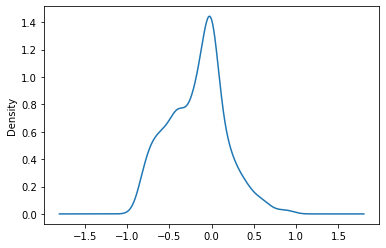

In [12]:
colorado = sentiment_covid[sentiment_covid['state'] == "CO"]
colorado['sentiment'].plot(kind='kde')

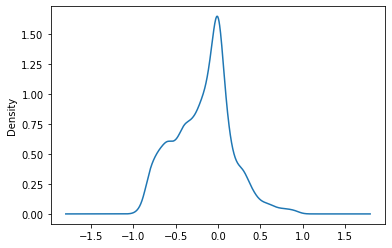

In [13]:
california = sentiment_covid[sentiment_covid['state'] == "CA"]
california['sentiment'].plot(kind='kde')

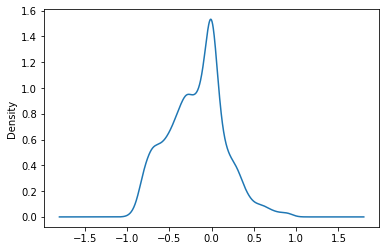

In [14]:
texas = sentiment_covid[sentiment_covid['state'] == "TX"]
texas['sentiment'].plot(kind='kde')

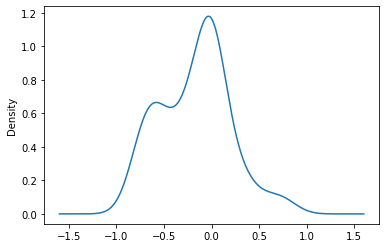

In [15]:
wyoming = sentiment_covid[sentiment_covid['state'] == "WY"]
wyoming['sentiment'].plot(kind='kde')

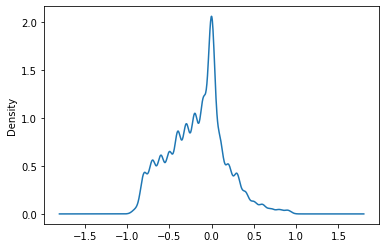

In [16]:
sentiment_covid['sentiment'].plot(kind='kde')

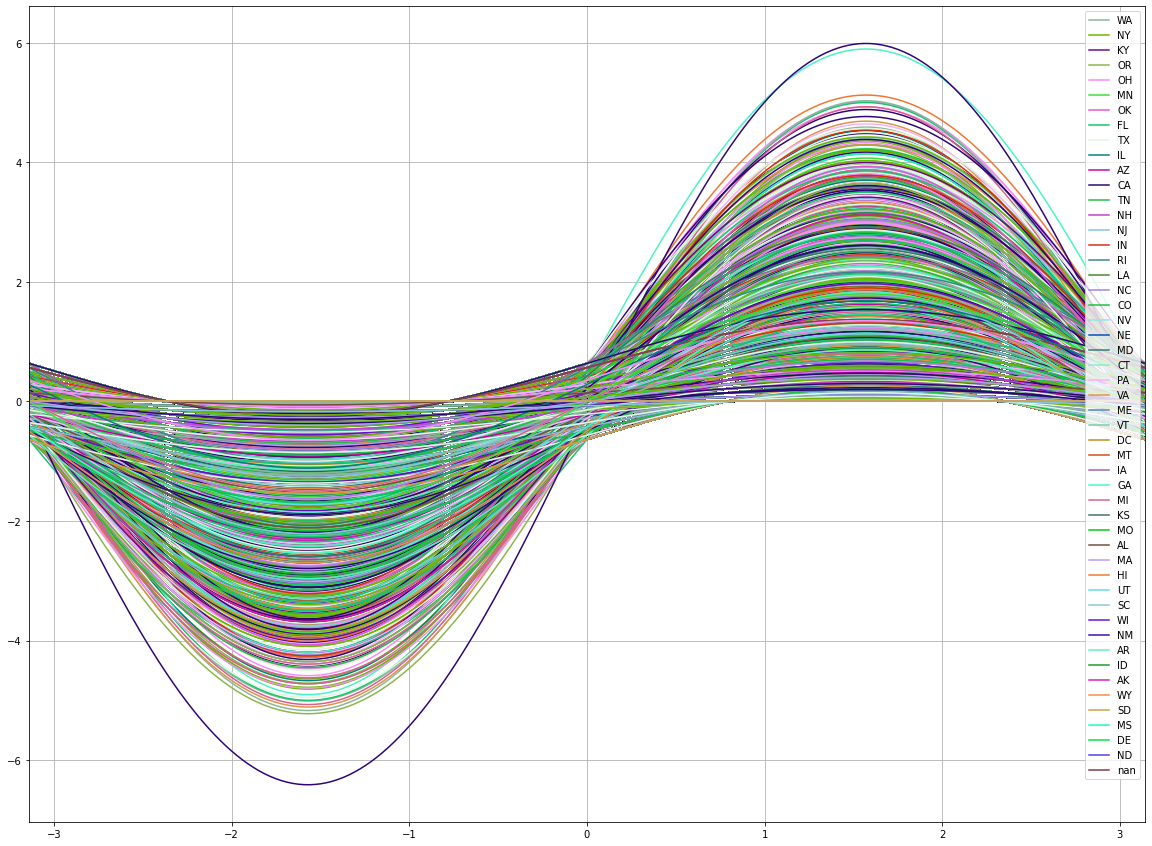

In [31]:
from pandas.plotting import andrews_curves
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
andrews_curves(sentiment_covid[['sentiment','magnitude','state']], 'state')
plt.savefig('andrew_curves_sent_mag_01')

<Figure size 1080x1080 with 0 Axes>

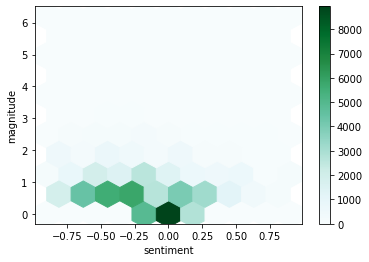

In [50]:
import numpy as np
plt.figure(figsize=(15,15))

sentiment_covid.plot.hexbin(sharex=False, y='magnitude', x='sentiment', reduce_C_function=np.max, gridsize=10)
plt.savefig('hexbin_01')

In [20]:
#https://plotly.com/python/choropleth-maps/#using-builtin-country-and-state-geometries
import plotly.express as px

fig = px.choropleth(locations=average_state_sentiment['state'], locationmode="USA-states", color=average_state_sentiment['sentiment'], scope="usa", )
fig.show()

In [25]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=average_state_sentiment['state'], # Spatial coordinates
    z = average_state_sentiment['sentiment'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    reversescale= True,
    colorbar_title = "Average Sentiment",
))

fig.update_layout(
    title_text = 'Average Sentiment on COVID Tweets in the US, 01/04/2020',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [29]:

fig = go.Figure(data=go.Choropleth(
    locations=average_state_sentiment['state'], # Spatial coordinates
    z = average_state_sentiment['magnitude'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Blues',
    reversescale= True,
    colorbar_title = "Average Magnitude",
))

fig.update_layout(
    title_text = 'Average Magnitude on COVID Tweets in the US, 01/04/2020',
    geo_scope='usa', # limite map scope to USA
)

fig.show()